In [12]:
import sys
sys.path.append("/glade/work/zilumeng/SSNLIM")
from slim import *
import pickle
import matplotlib.pyplot as plt
import cftime
import numpy as np
import pandas as pd
import xarray as xr
from EOF import EOF

class make_dataset_test():
    def __init__(
        self,
        address,
        needtauxy,
        lev_range=(0, 1),
        lon_range=(0, 1),
        lat_range=(0, 1),
    ):
        data_in = xr.open_dataset(address)
        self.lev = data_in["lev"].values
        self.lat = data_in["lat"].values
        self.lon = data_in["lon"].values
        self.lev_range = lev_range
        self.lon_range = lon_range
        self.lat_range = lat_range

        temp = data_in["temperatureNor"][
            :,
            lev_range[0] : lev_range[1],
            lat_range[0] : lat_range[1],
            lon_range[0] : lon_range[1],
        ].values
        temp = np.nan_to_num(temp)
        temp[abs(temp) > 999] = 0
        if needtauxy:
            taux = data_in["tauxNor"][
                :,
                lat_range[0] : lat_range[1],
                lon_range[0] : lon_range[1],
            ].values
            taux = np.nan_to_num(taux)
            taux[abs(taux) > 999] = 0
            tauy = data_in["tauyNor"][
                :,
                lat_range[0] : lat_range[1],
                lon_range[0] : lon_range[1],
            ].values
            tauy = np.nan_to_num(tauy)
            tauy[abs(tauy) > 999] = 0
            # --------------
            self.dataX = np.concatenate(
                (taux[:, None], tauy[:, None], temp), axis=1
            )
            del temp, taux, tauy
        else:
            self.dataX = temp
            del temp

    def getdatashape(self):
        return {
            "dataX.shape": self.dataX.shape,
        }

    def selectregion(self):
        return {
            "lon: {}E to {}E".format(
                self.lon[self.lon_range[0]],
                self.lon[self.lon_range[1] - 1],
            ),
            "lat: {}S to {}N".format(
                self.lat[self.lat_range[0]],
                self.lat[self.lat_range[1] - 1],
            ),
            "lev: {}m to {}m".format(
                self.lev[self.lev_range[0]], self.lev[self.lev_range[1] - 1]
            ),
        }

    def __len__(self):
        return self.dataX.shape[0]

    def __getitem__(self, idx):
        return self.dataX[idx]

data = make_dataset_test(
    address="../data/GODAS_up150m_temp_nino_tauxy_1980_2021_kb.nc",
    needtauxy=True,
    lev_range=(1, 8),
    lon_range=(45, 165),
    lat_range=(0, 51),
).dataX

In [13]:
data.shape

(504, 9, 51, 120)

In [14]:
with open("../LIM/eof.pkl",'rb') as f:
    sst_svd = pickle.load(f)

In [26]:
new_pc = sst_svd.projection(data)[:15]

In [27]:
# new_pc.shape
# months = np.reanp.arange(1, 13)
months = np.repeat(np.arange(1,13)[np.newaxis,:],new_pc.shape[1]//12,axis=0).flatten()
months.shape,new_pc.shape

((504,), (15, 504))

In [32]:
# for 
fors_all_ls = []
for model_num0 in range(0,20,3):
    print(model_num0)
    model_num1 = model_num0 + 3

    with open(f"../LIM/lim/lim_{model_num0}_{model_num1}.pkl",'rb') as f:
        lim = pickle.load(f)
    # new_pc = sst_svd.projection(data)
    # lim.forcast(new_pc.T,length=20)\
    fors_all = np.zeros((new_pc.shape[1],20,15))
    for month in range(1,13):
        print(month)
        print(new_pc[:,months==month].T.shape)
        fors = lim.forecast(new_pc[:,months==month].T,length=20,month0=month).transpose(1,0,2)
        fors_all[months==month] = fors
    fors_all_ls.append(fors_all)

0
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)
3
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)
6
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)
9
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)
12
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)
15
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)
18
1
(42, 15)
2
(42, 15)
3
(42, 15)
4
(42, 15)
5
(42, 15)
6
(42, 15)
7
(42, 15)
8
(42, 15)
9
(42, 15)
10
(42, 15)
11
(42, 15)
12
(42, 15)


In [33]:
fors_all_ls = np.array(fors_all_ls)
fors_all_ls.shape

(7, 504, 20, 15)

In [34]:
np.save("./pred/lim_pre.npy",fors_all_ls)

In [35]:
all_or = sst_svd.decoder1(fors_all_ls)
all_or.shape

(7, 504, 20, 9, 51, 120)

In [42]:
lon = np.array(
    [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,
        26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,
        74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,
        98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118., 120.,
       122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142., 144.,
       146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166., 168.,
       170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
       194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214., 216.,
       218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262., 264.,
       266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286., 288.,
       290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310., 312.,
       314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334., 336.,
       338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.]
)[45:165]
lat = np.array([-20. , -19. , -18. , -17. , -16. , -15. , -14. , -13. , -12. , -11. ,
       -10. ,  -9. ,  -8. ,  -7. ,  -6. ,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,
        -2.5,  -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,
         2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   6. ,   7. ,   8. ,   9. ,
        10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,  18. ,  19. ,
        20. ])[0:51]

In [43]:
lon.shape,lat.shape

((120,), (51,))

In [45]:
xr.Dataset({'pred':xr.DataArray(
    all_or,
    dims=["model_num","time","pred","lev","lat","lon"],
    coords={
        "model_num":np.arange(0,20,3),
        "time":np.arange(0,504),
        "pred":np.arange(1,21),
        "lev":np.arange(0,9),
        "lat":lat,
        "lon":lon,
    },
)}).to_netcdf("./pred/lim_pred.nc")

In [48]:
real_data = data
all_or_mean = np.mean(all_or,axis=0)
real_data.shape,all_or.shape,all_or_mean.shape

((504, 9, 51, 120), (7, 504, 20, 9, 51, 120), (504, 20, 9, 51, 120))

In [49]:
def field_corr(field1, field2):
    """
    field1: time, nspace
    field2: time, nspace
    """
    field1a = field1 - field1.mean(axis=0)
    field2a = field2 - field2.mean(axis=0)
    covar = np.einsum("ij...,ij...->j...", field1a, field2a) / (field1a.shape[0] - 1)  # covar:nspace
    corr = covar / np.std(field1a, axis=0) / np.std(field2a, axis=0)  # corr: nspace
    return corr.real

In [51]:
corr_ls = []
for lead_time in range(0,20):
    pred_data = all_or_mean[:-(lead_time+1),lead_time]
    real_data0 = real_data[lead_time+1:]
    # print(pred_data.shape,real_data0.shape)
    corr0 = field_corr(pred_data,real_data0)
    corr_ls.append(corr0)

/glade/derecho/scratch/zilumeng/tmp/ipykernel_63577/1976098560.py:9: RuntimeWarning: invalid value encountered in divide
  corr = covar / np.std(field1a, axis=0) / np.std(field2a, axis=0)  # corr: nspace


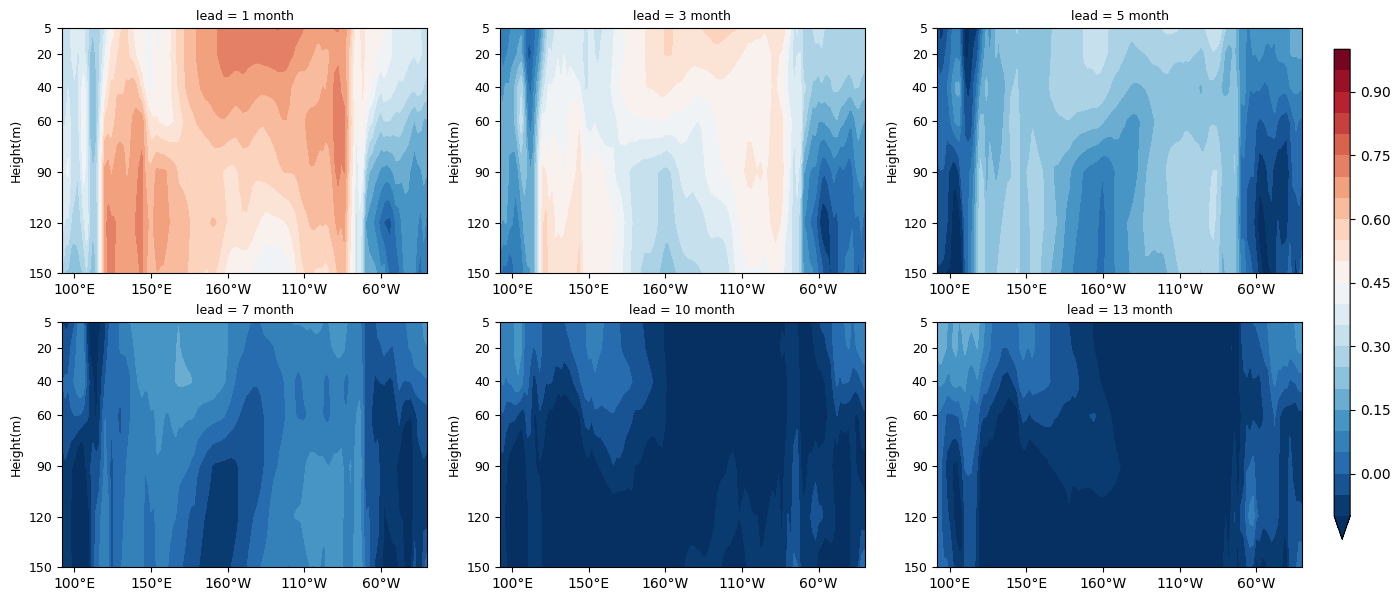

In [58]:
fig = plt.figure(figsize=(16, 7))
idx = 0
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

lon = np.arange(2,359,2)[45:165]
height = [5.,  20.,  40.,  60.,  90., 120., 150.]
for i in [0, 2,4,6,9, 12]:
    idx = idx + 1
    # plt.plot(corrs_lat_mean[i], label=str(i + 1))
    ax = fig.add_subplot(2, 3, idx)
    m = ax.contourf(lon,height,np.nanmean(corr_ls[i][2:],axis=1), levels=np.arange(-0.1, 1+0.01, 0.05), cmap="RdBu_r",extend='min')
    ax.invert_yaxis()
    # ax.set_yscale("exp")
    ax.set_yticks([5, 20, 40, 60, 90, 120, 150])
    ax.set_yticklabels([5, 20, 40, 60, 90, 120, 150], fontsize=9)
    ax.set_title("lead = " + str(i + 1) + ' month', fontsize=9)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.set_ylabel("Height(m)", fontsize=9)
    # ax.set_xticks
ax_bar = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(m, cax=ax_bar)
plt.savefig("./pic/lim_pred.png",dpi=300,bbox_inches='tight')

In [64]:
Nino_corr = np.nanmean(np.array(corr_ls)[:,2,15:36,49: 75],axis=(-1,-2))
np.save("./pred/lim_pred_nino34_corr.npy",Nino_corr)

In [65]:
np.save("./pred/lim_pred_corr.npy",np.array(corr_ls))

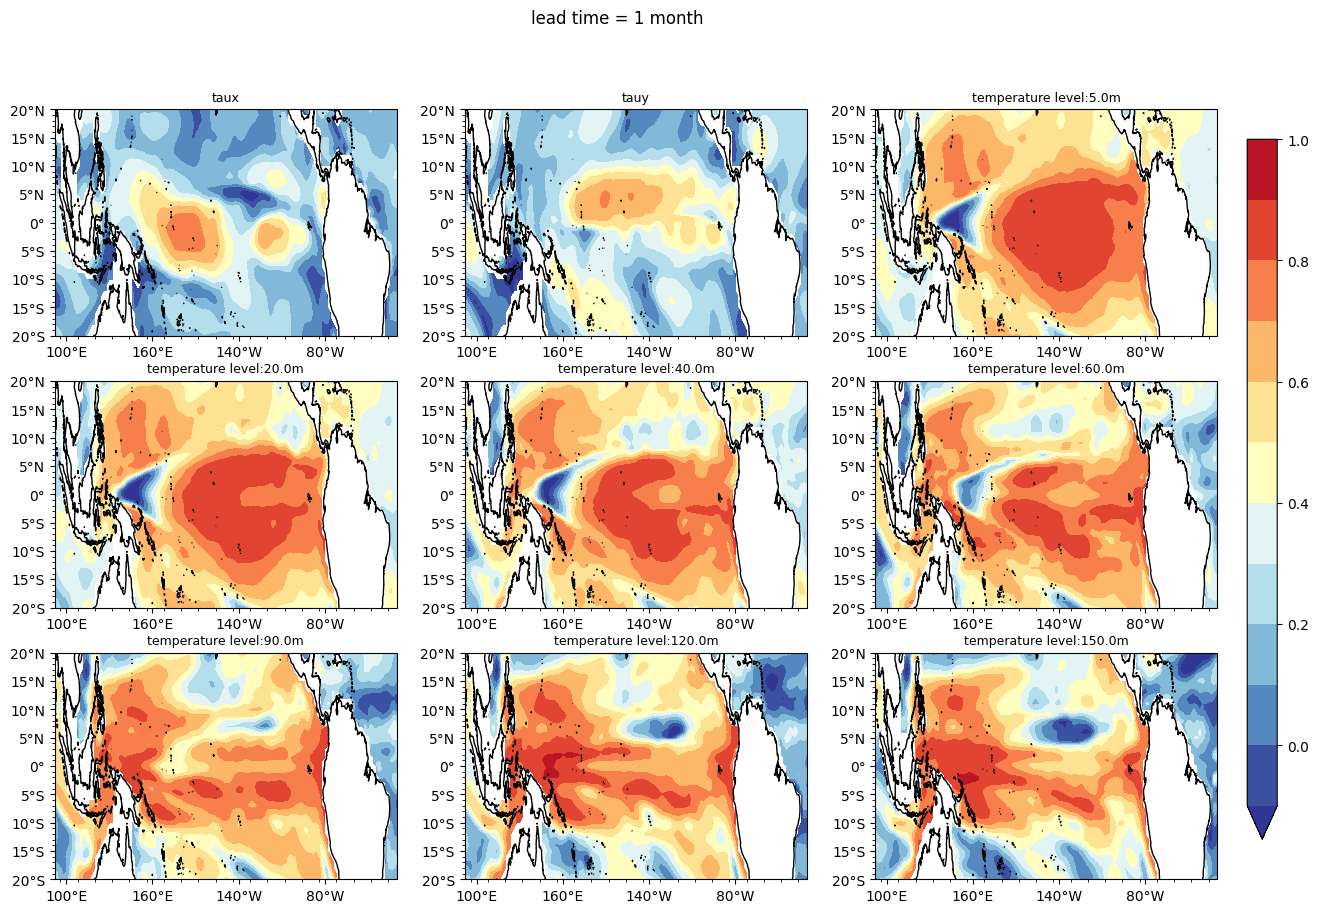

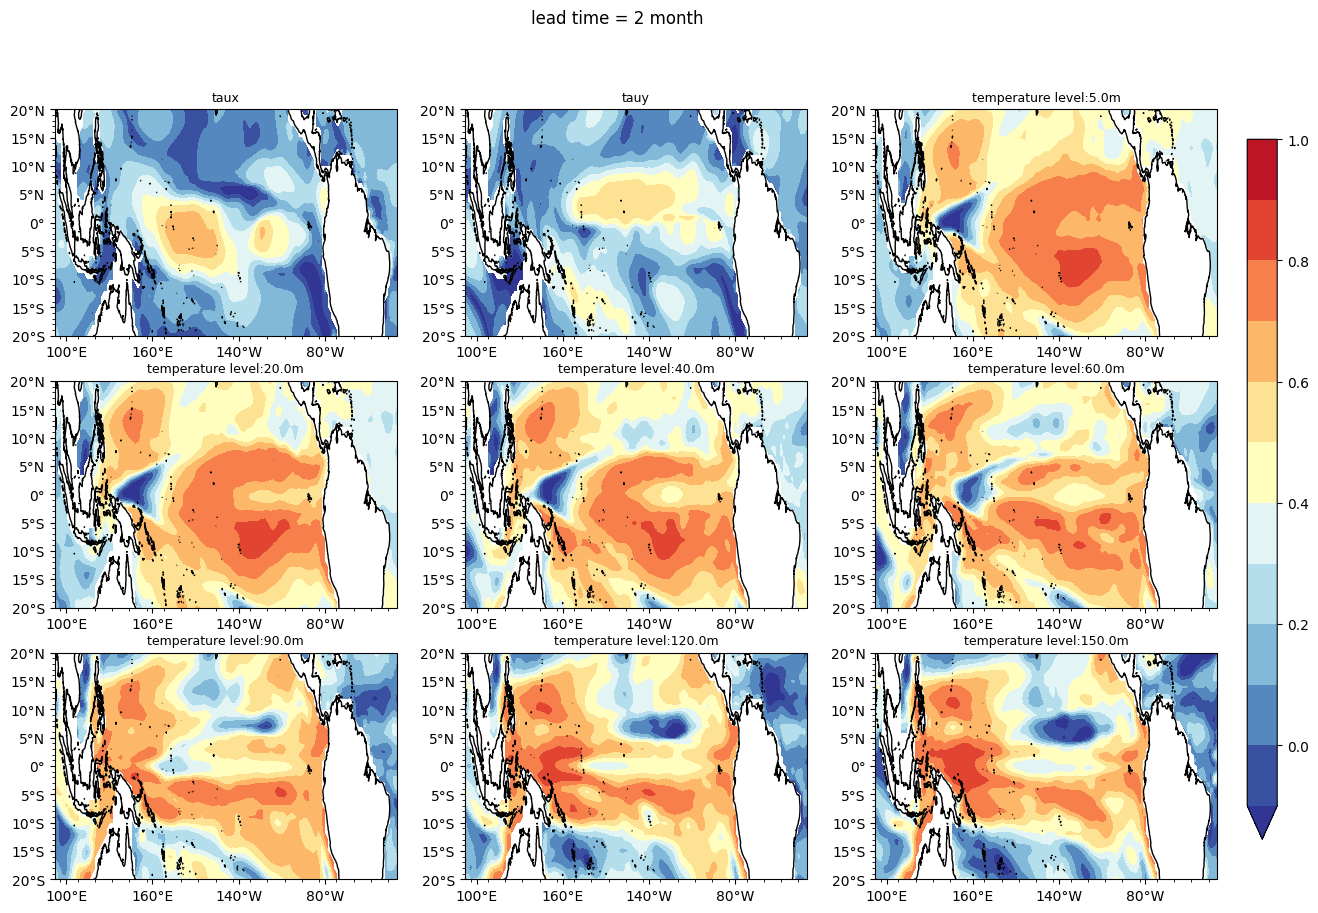

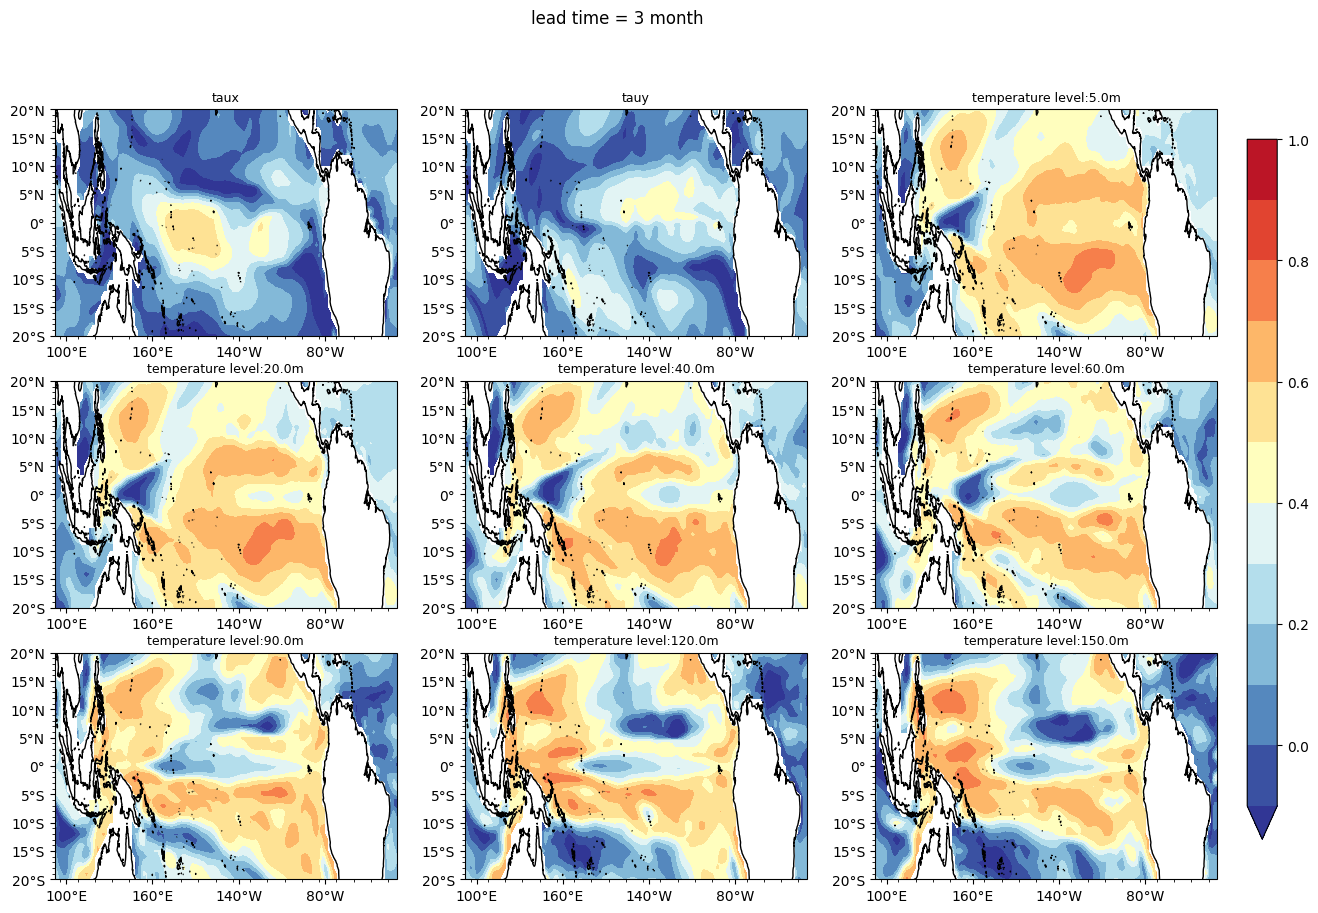

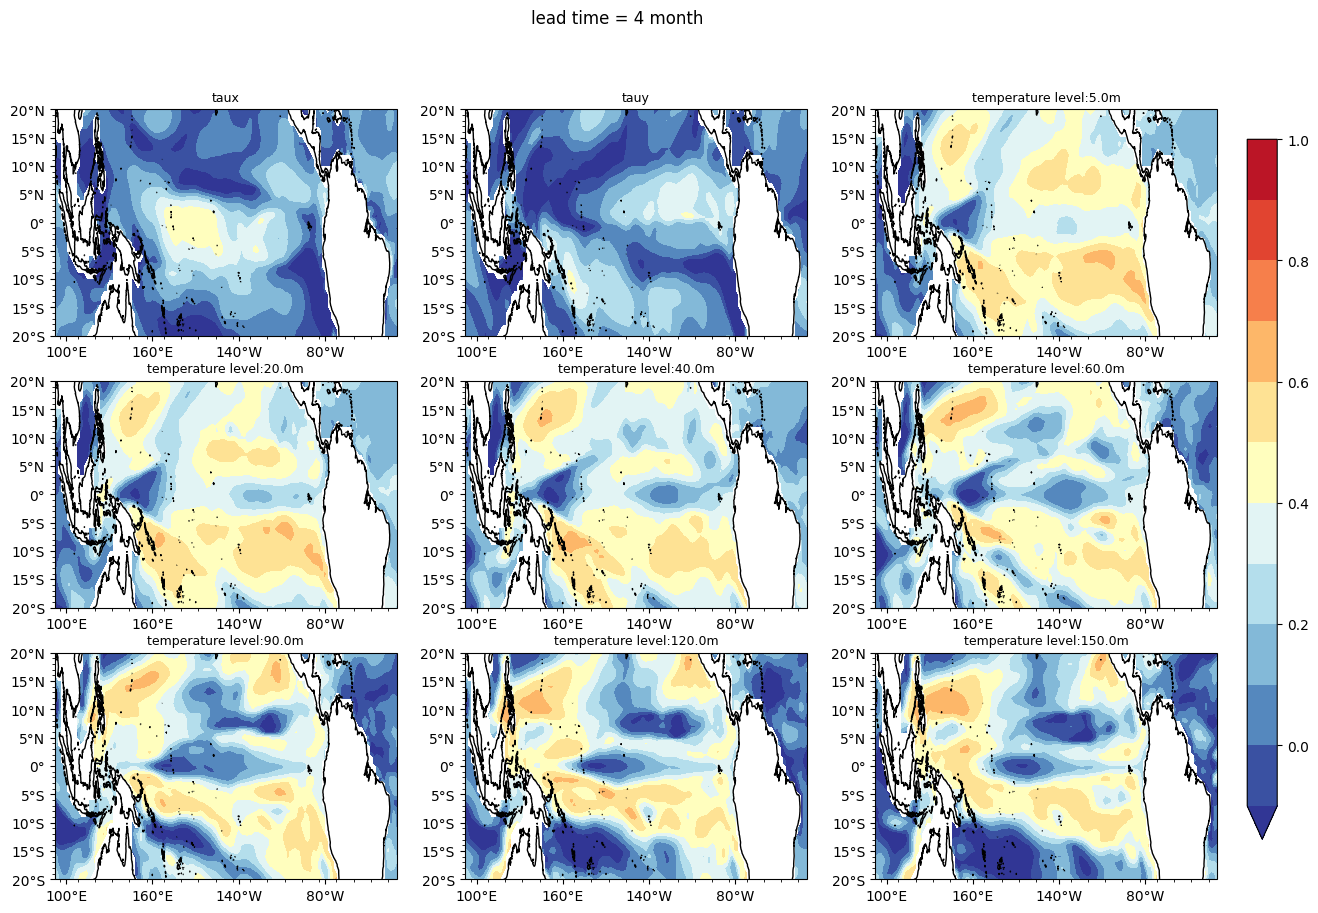

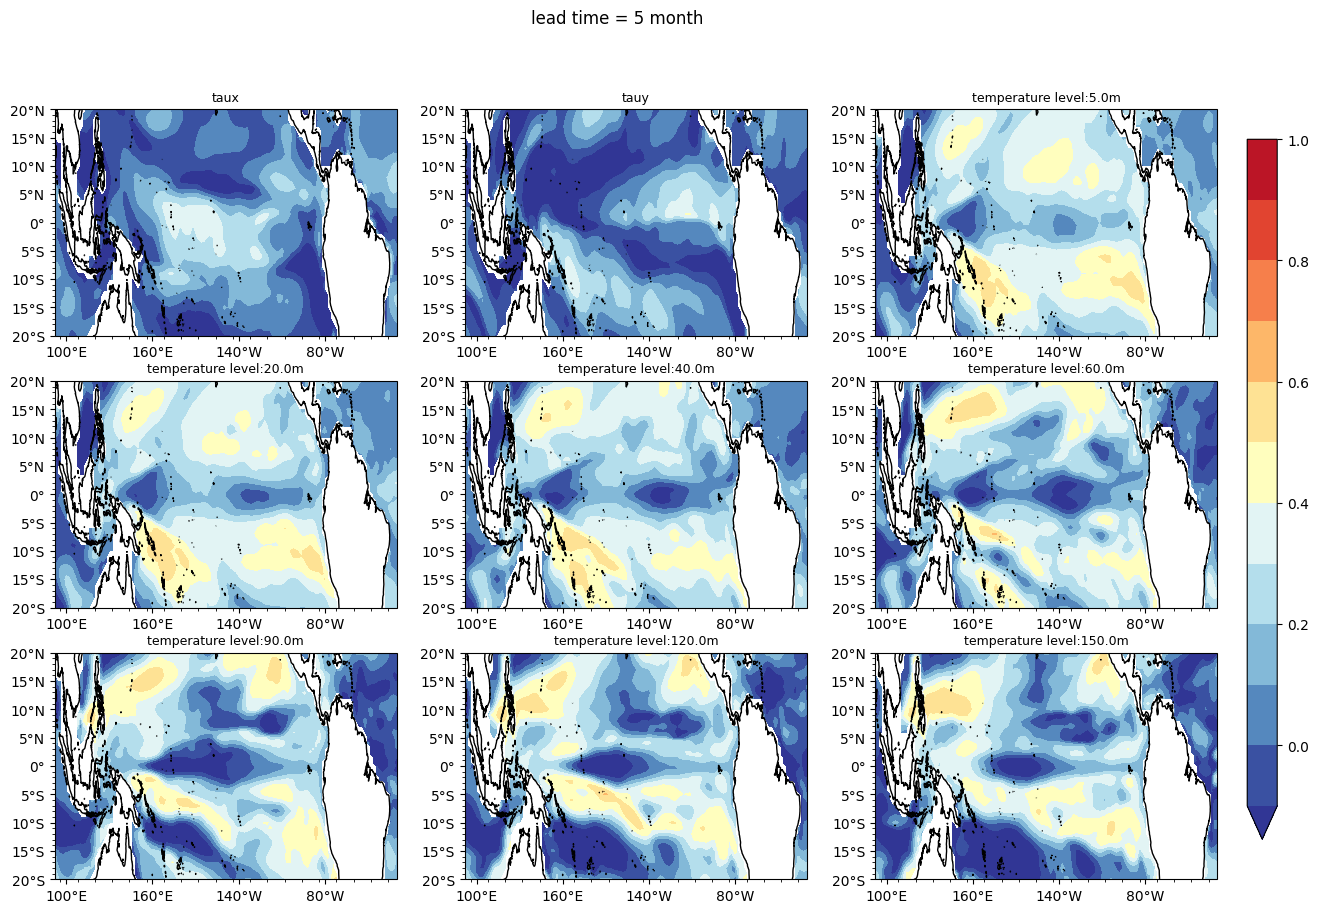

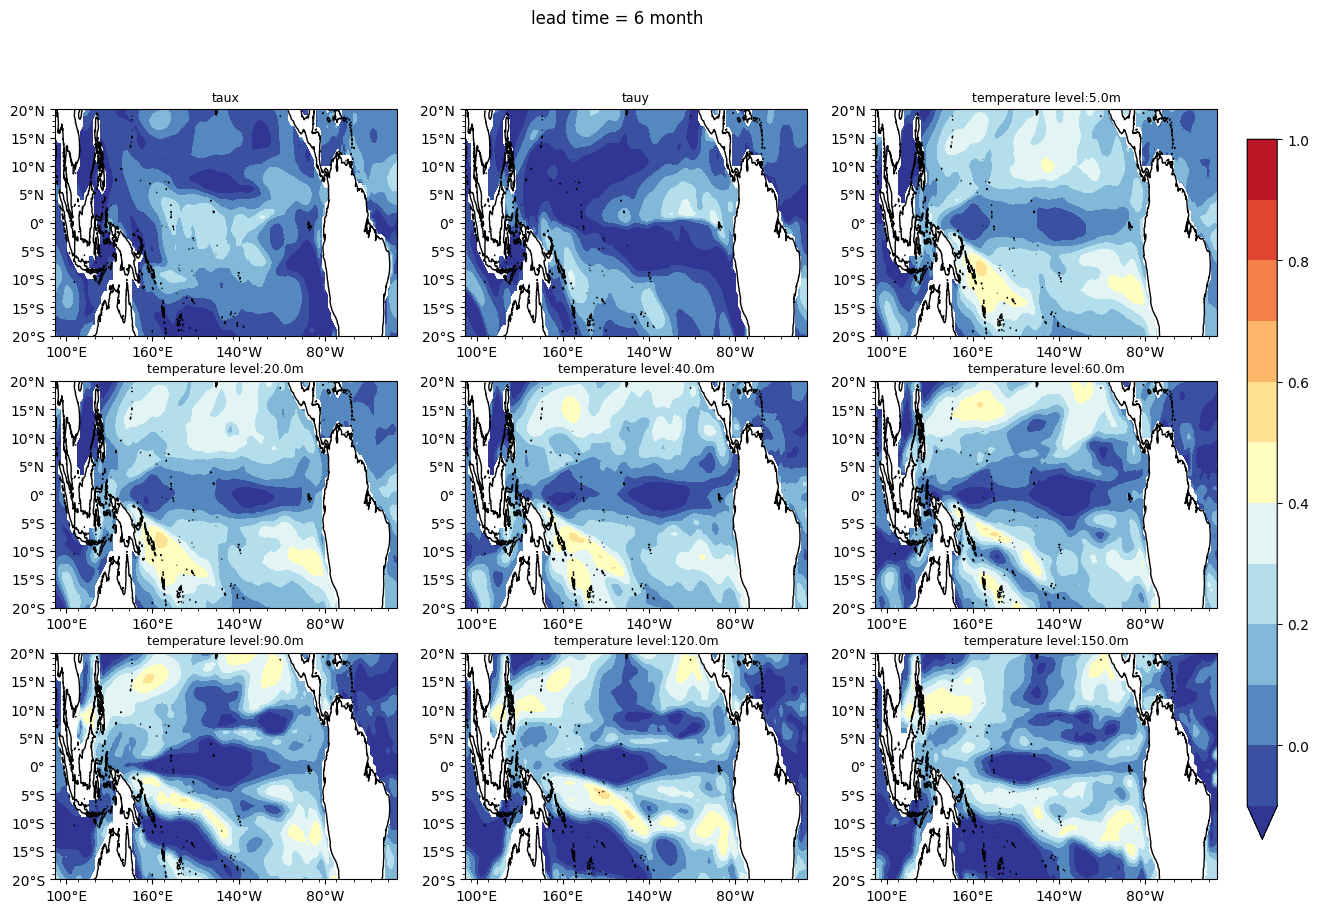

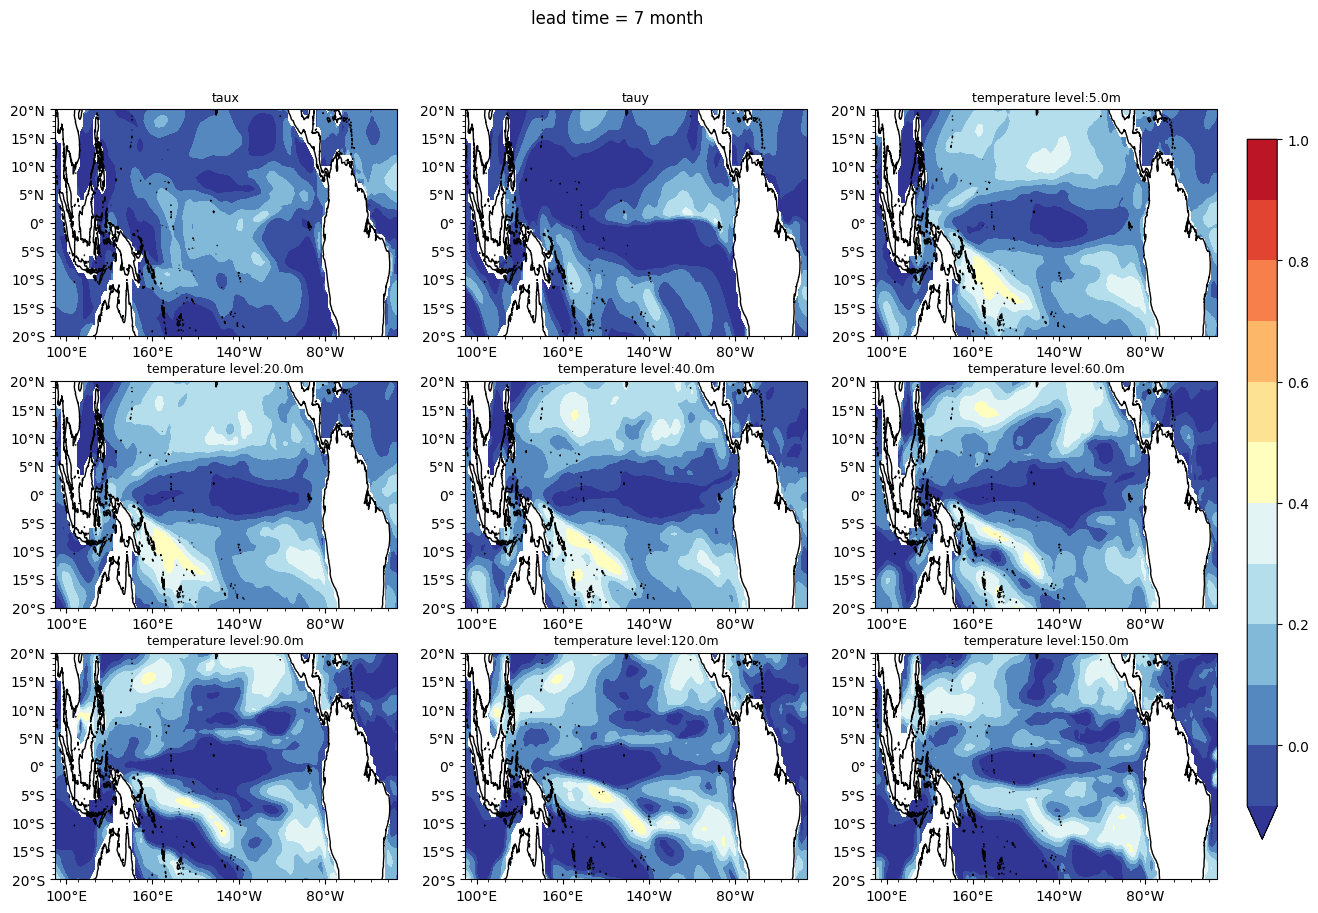

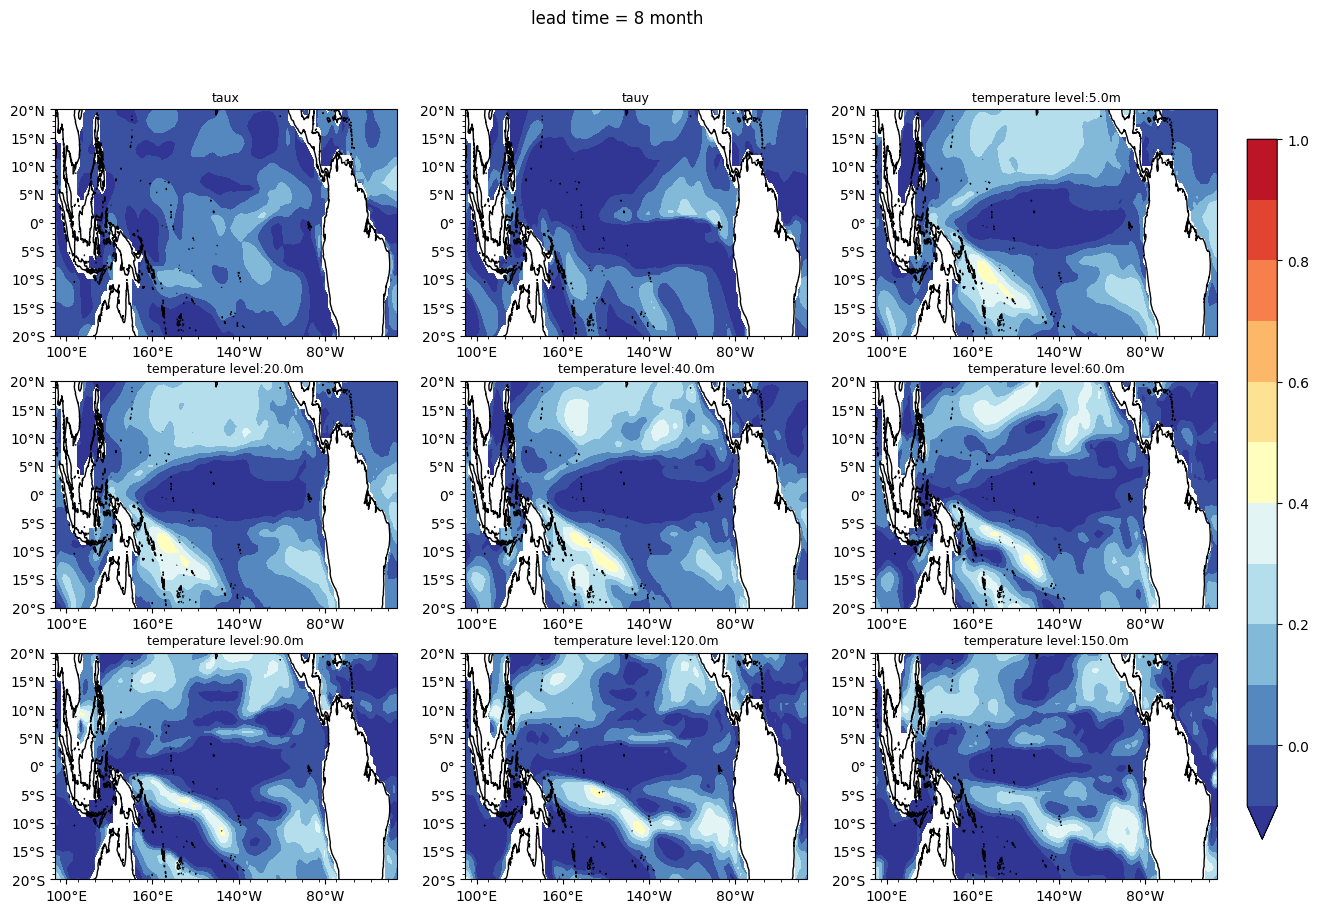

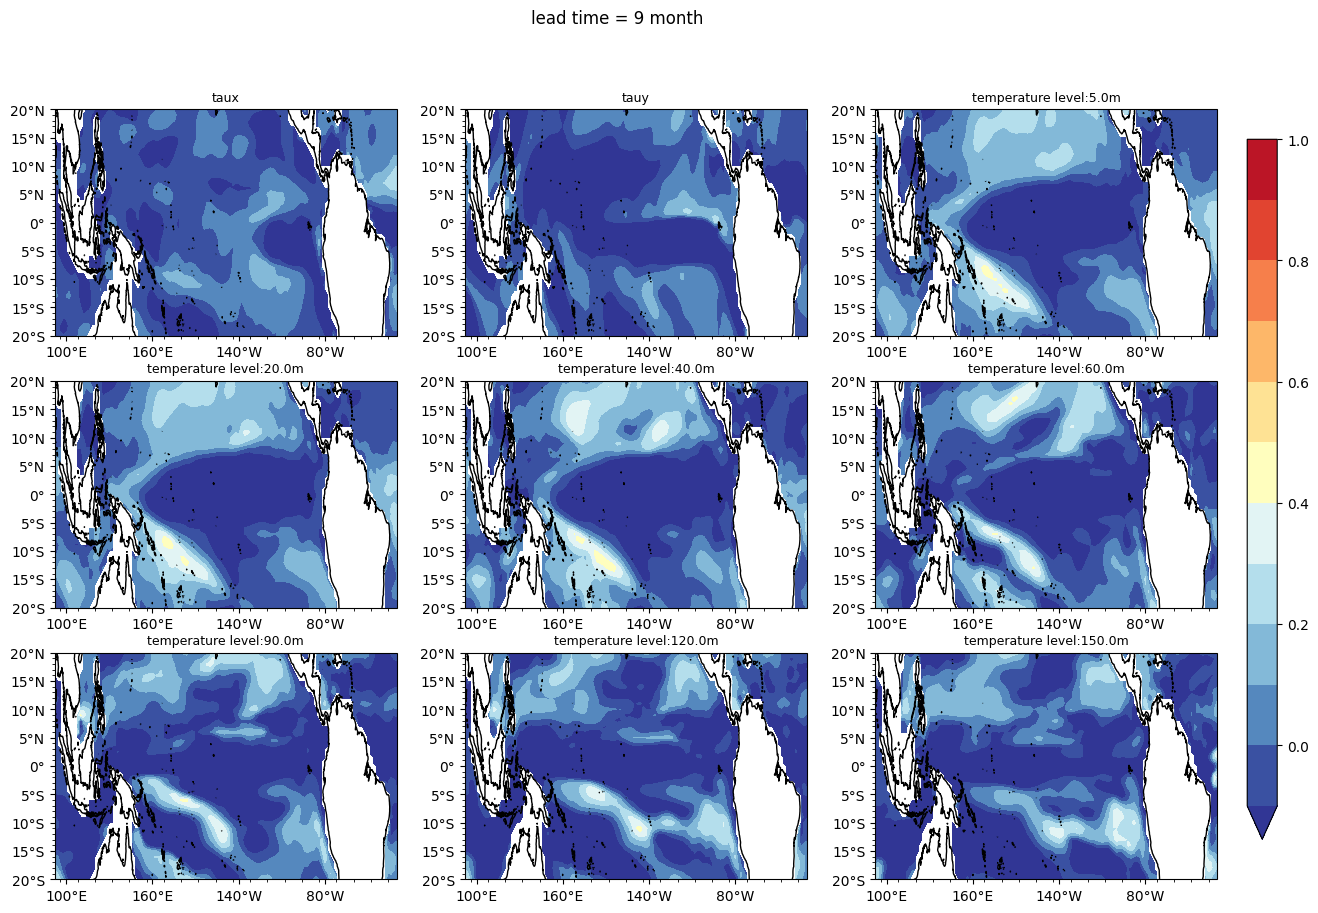

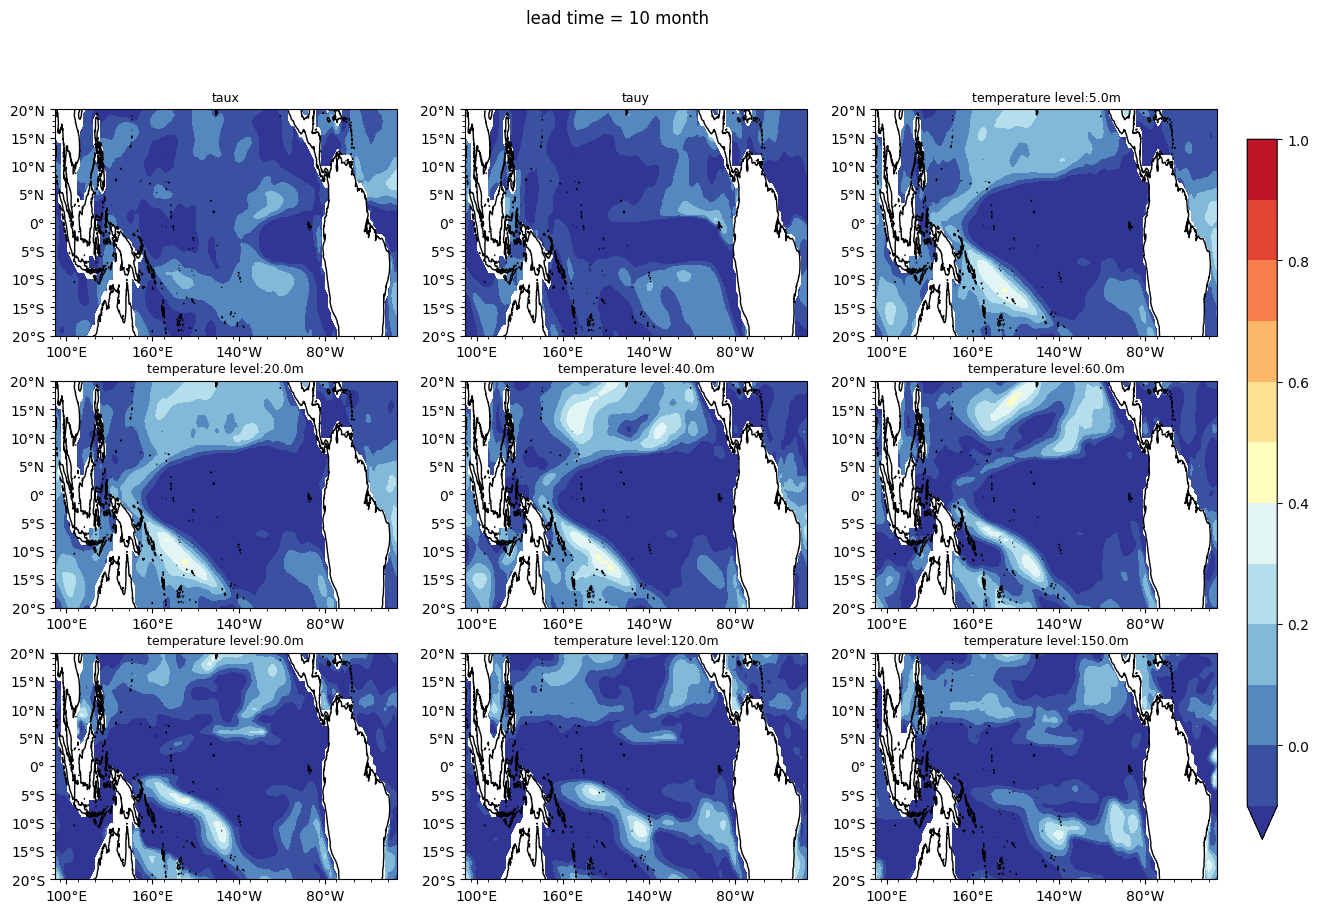

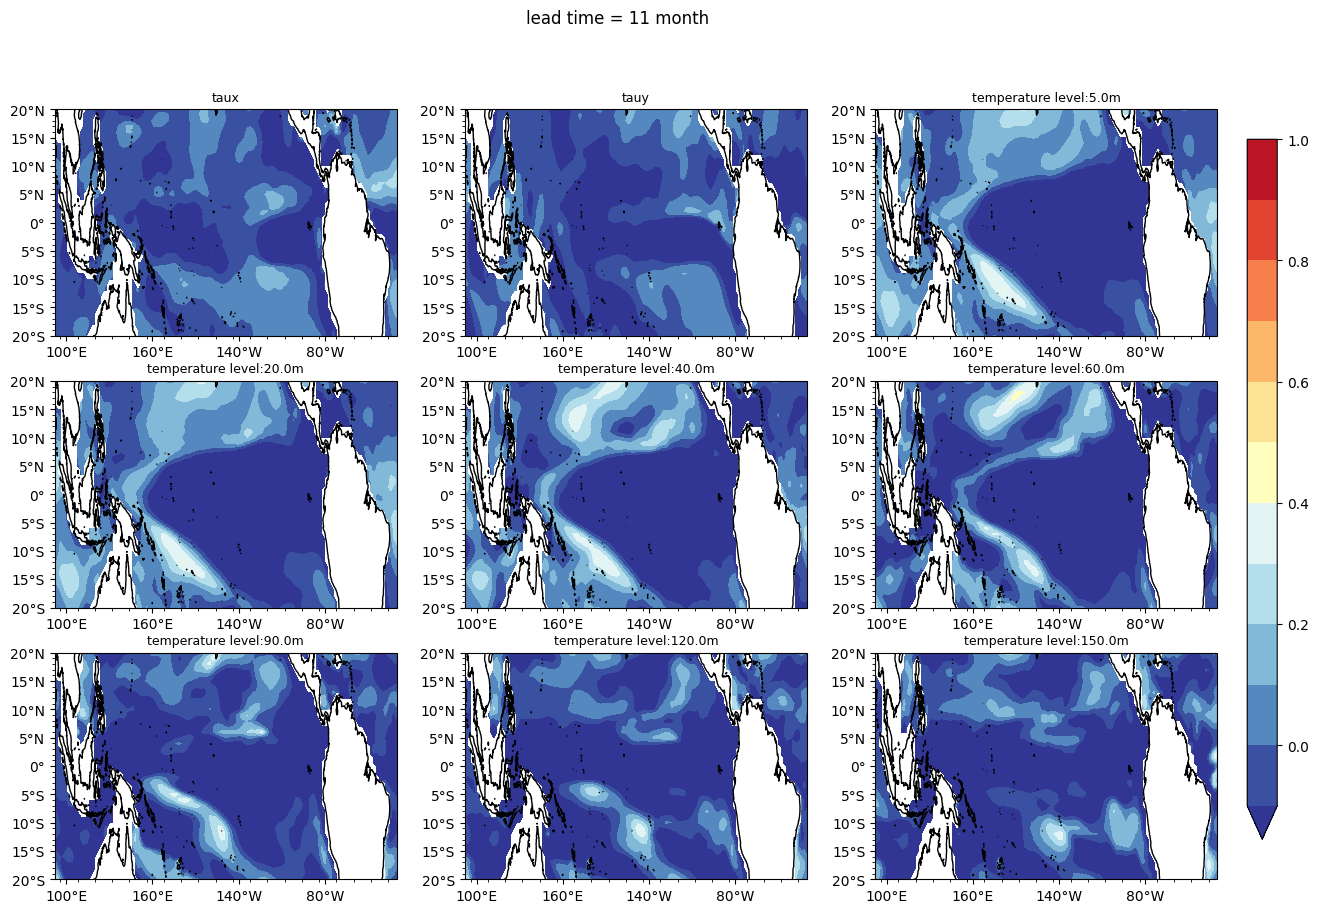

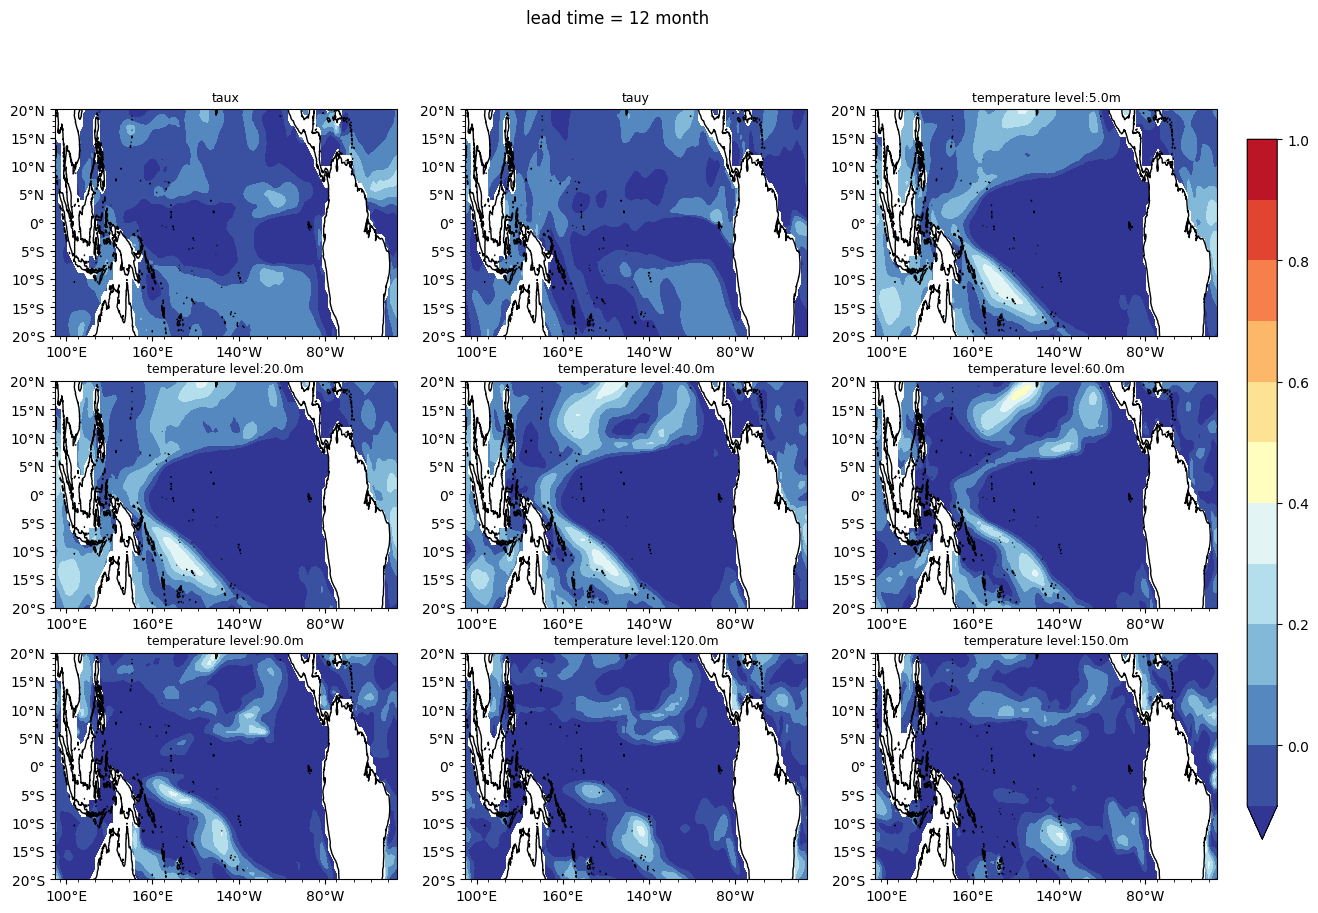

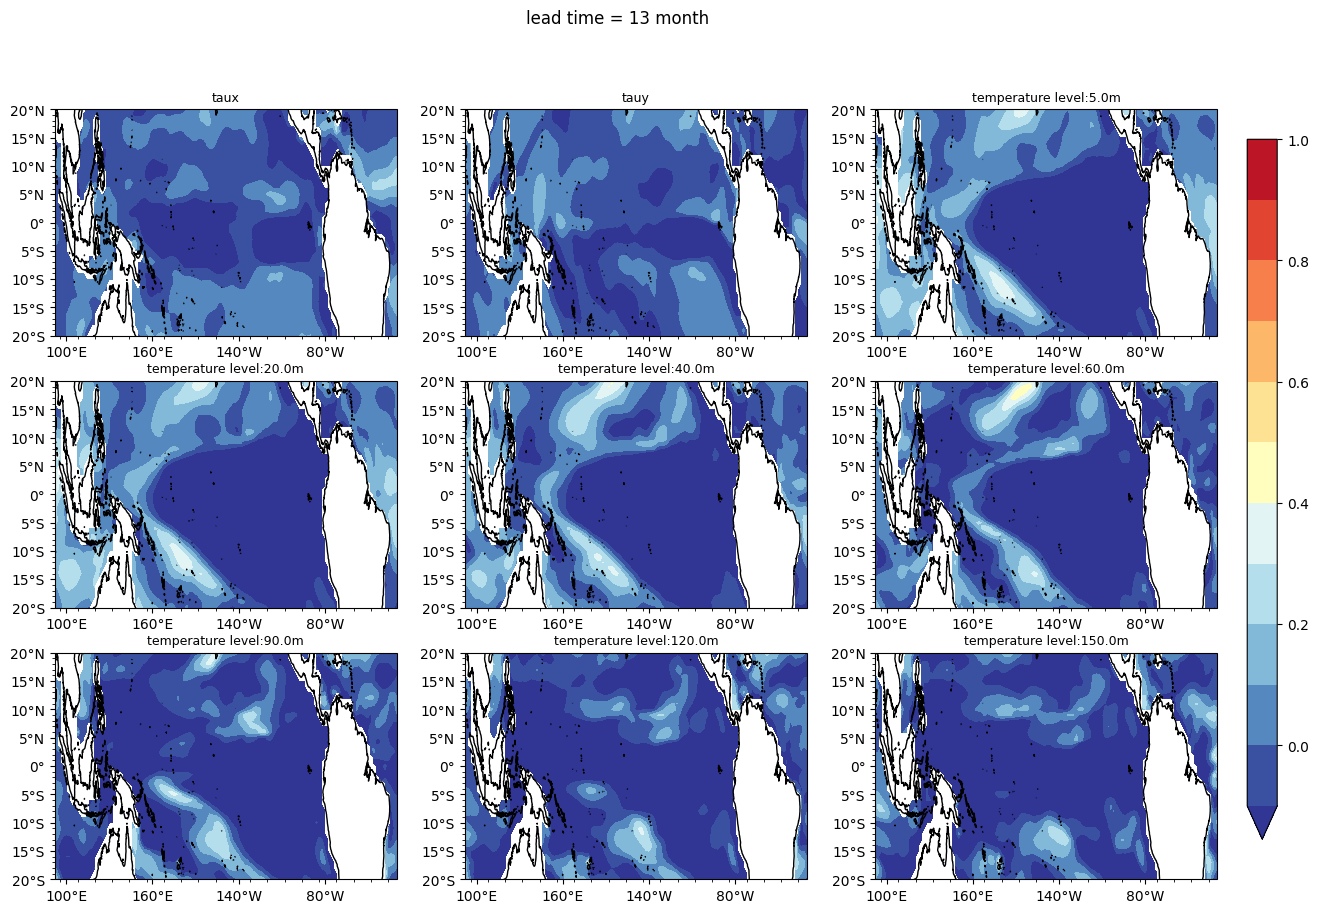

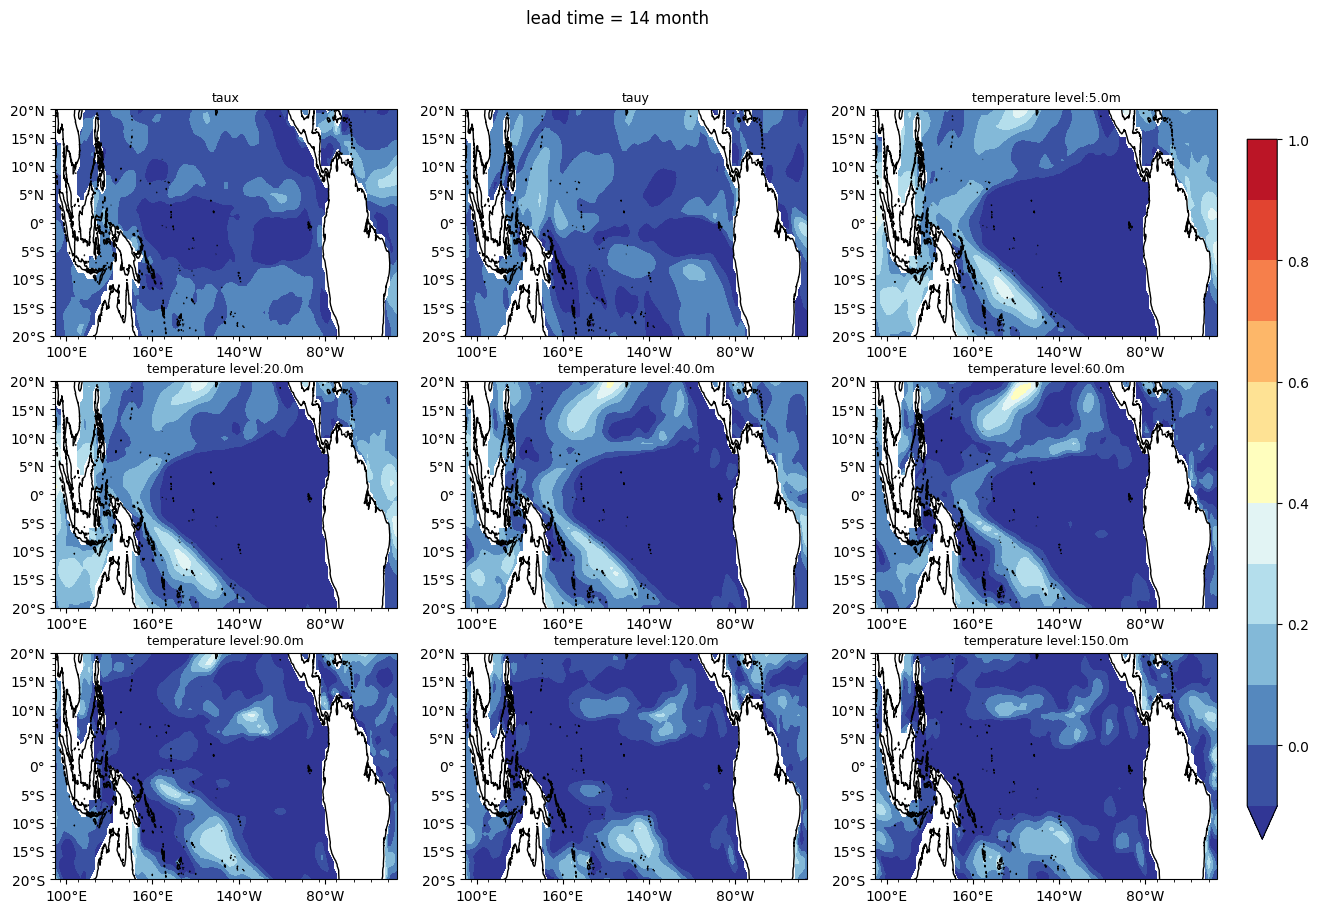

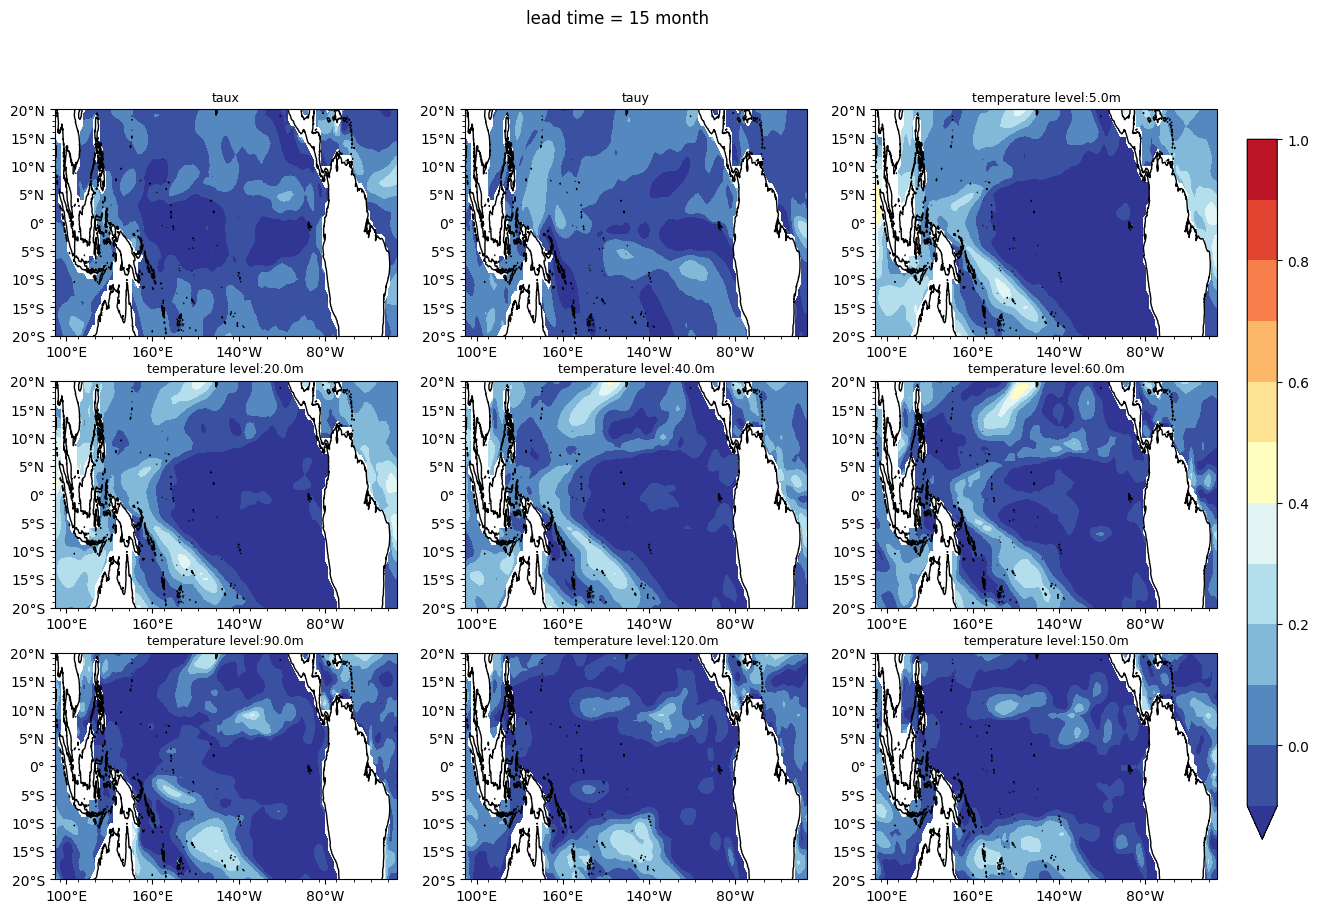

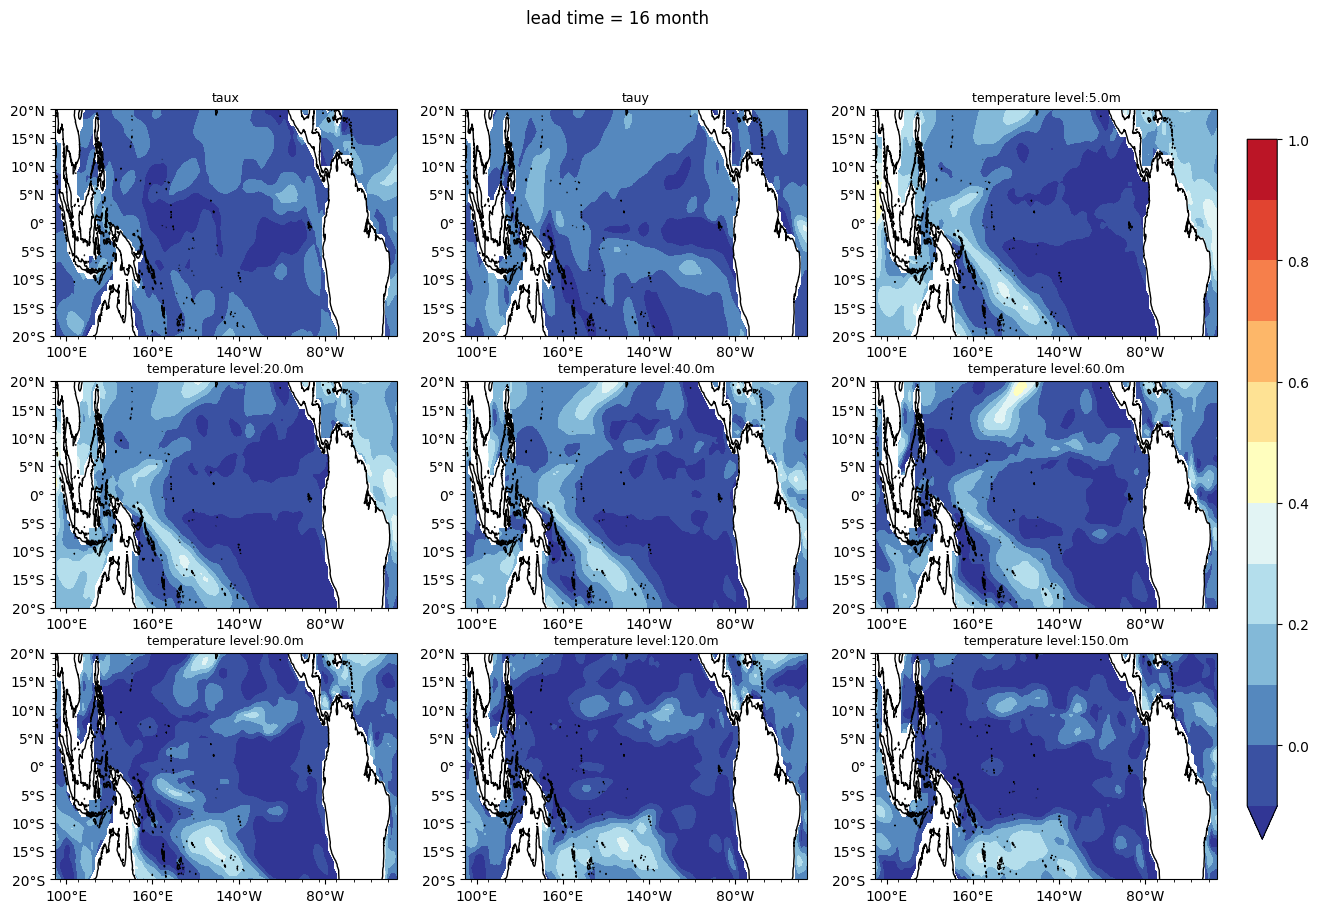

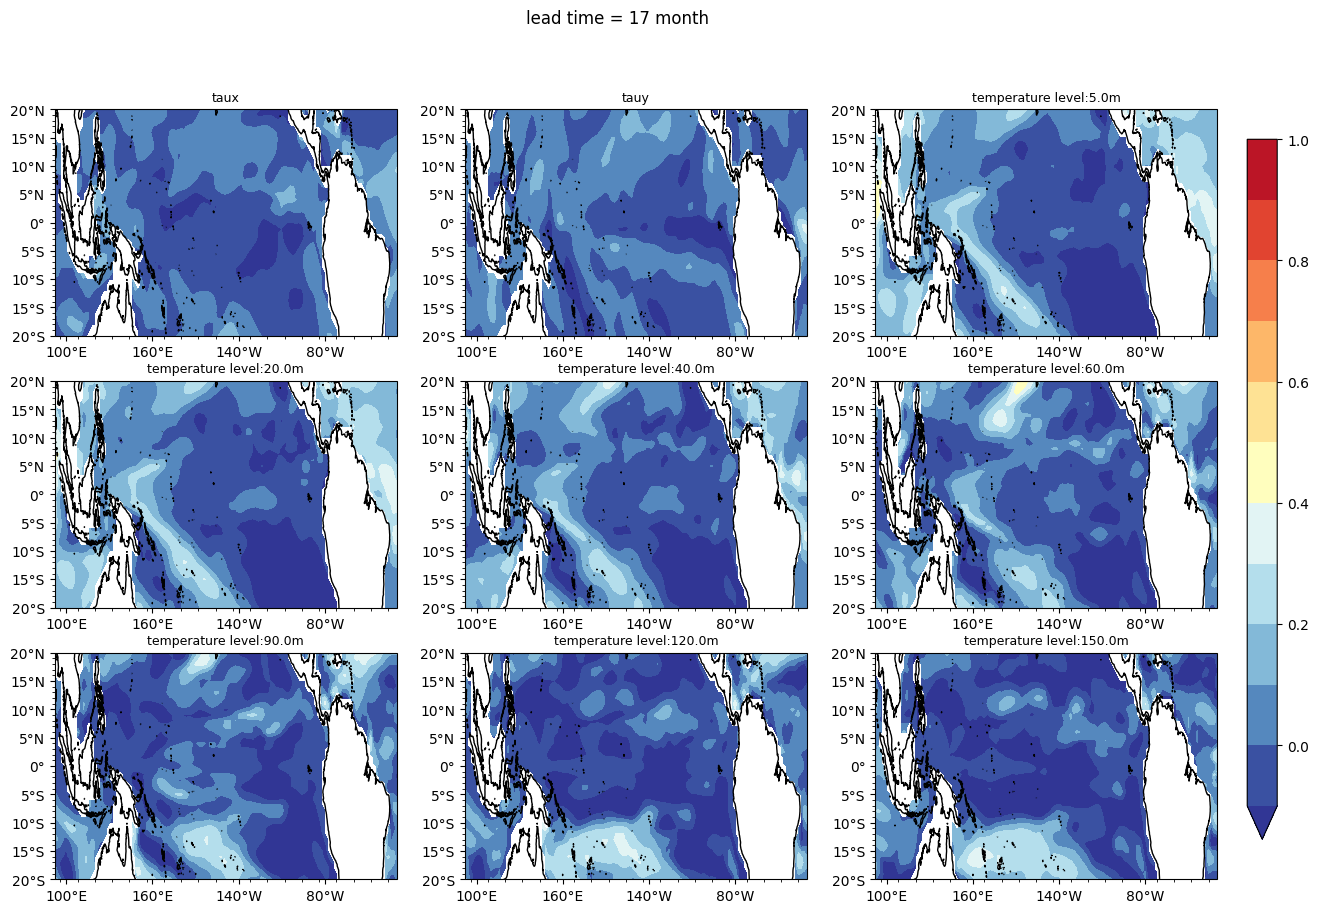

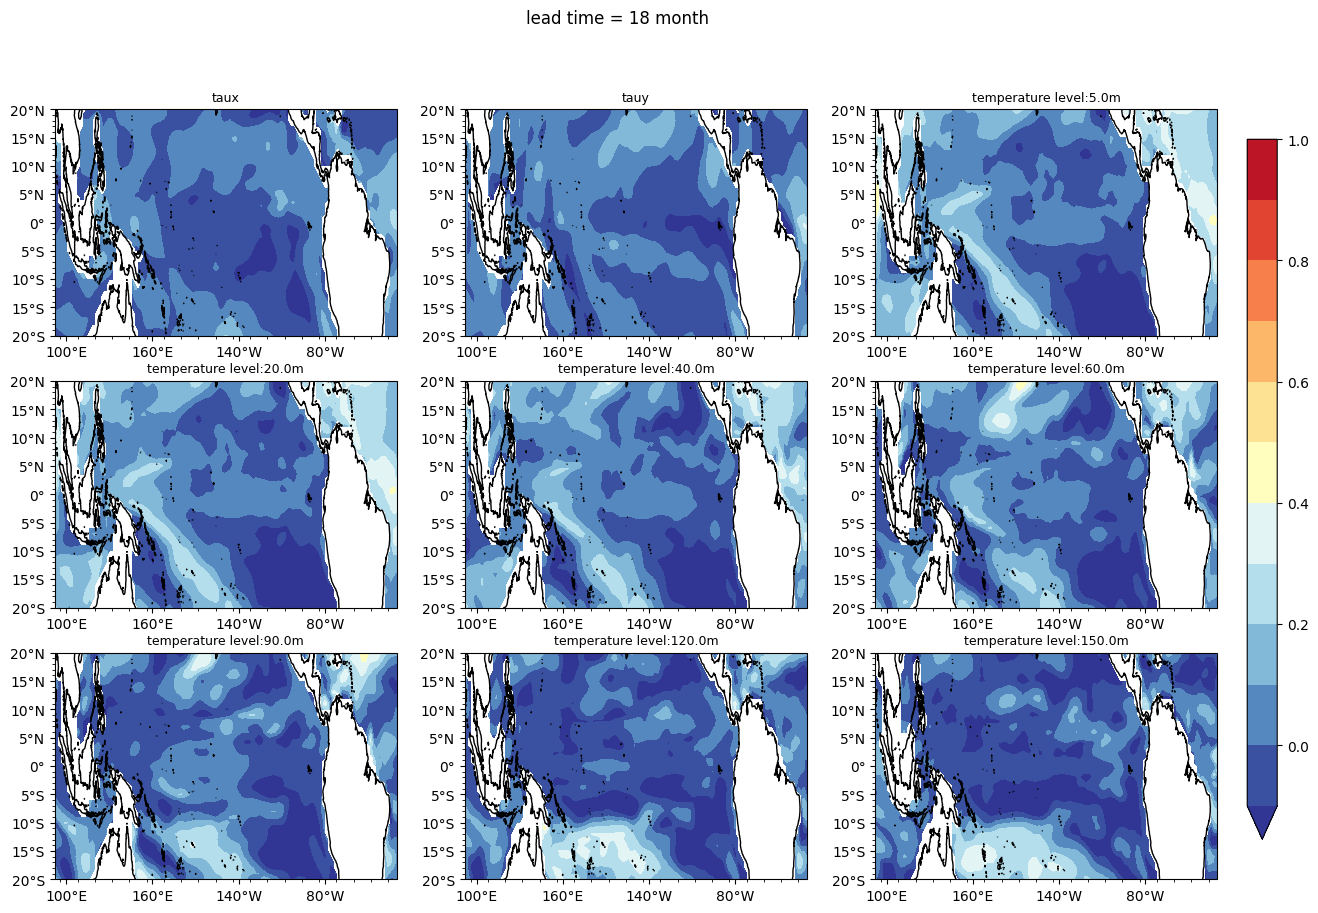

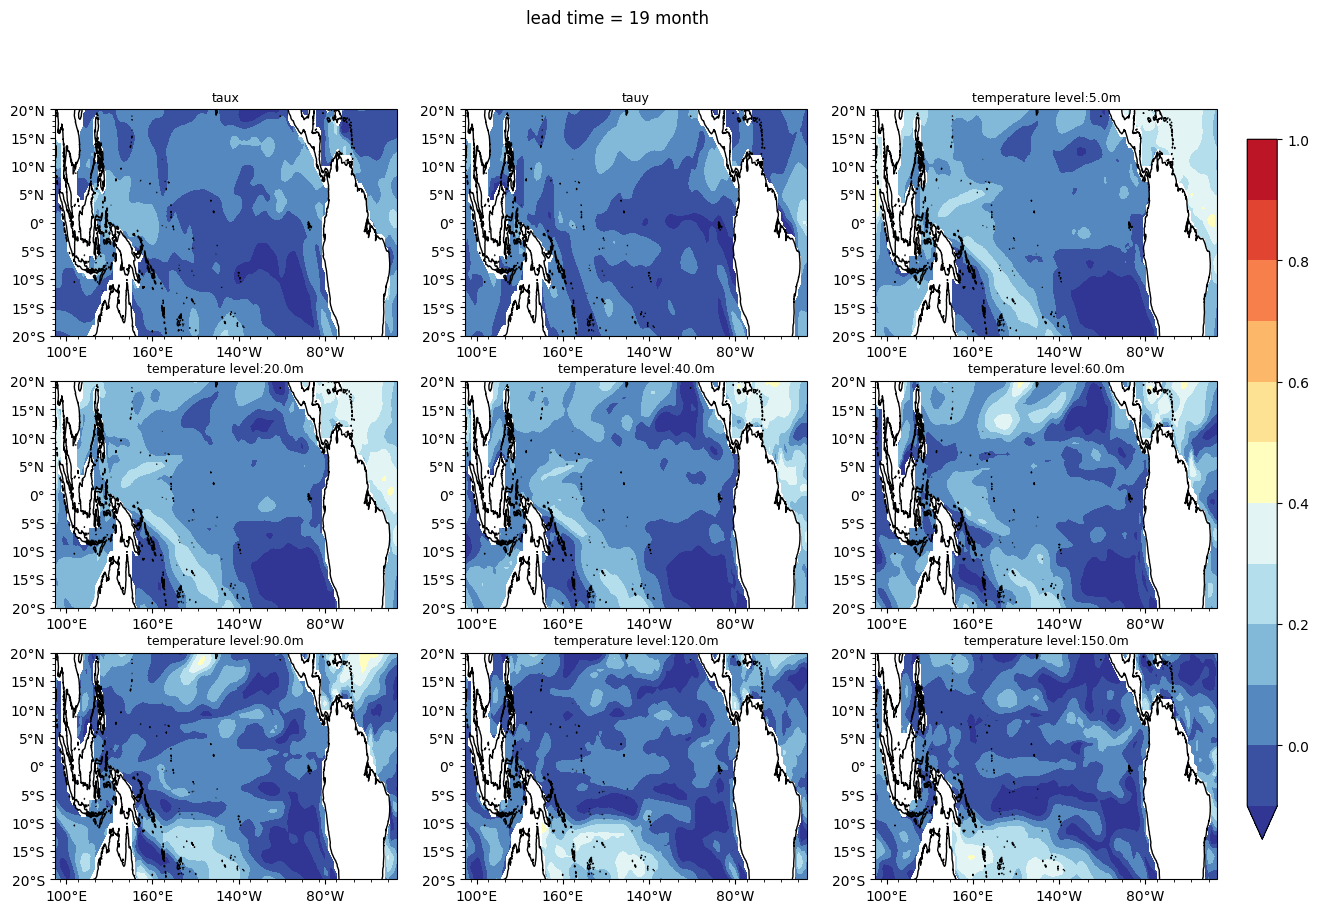

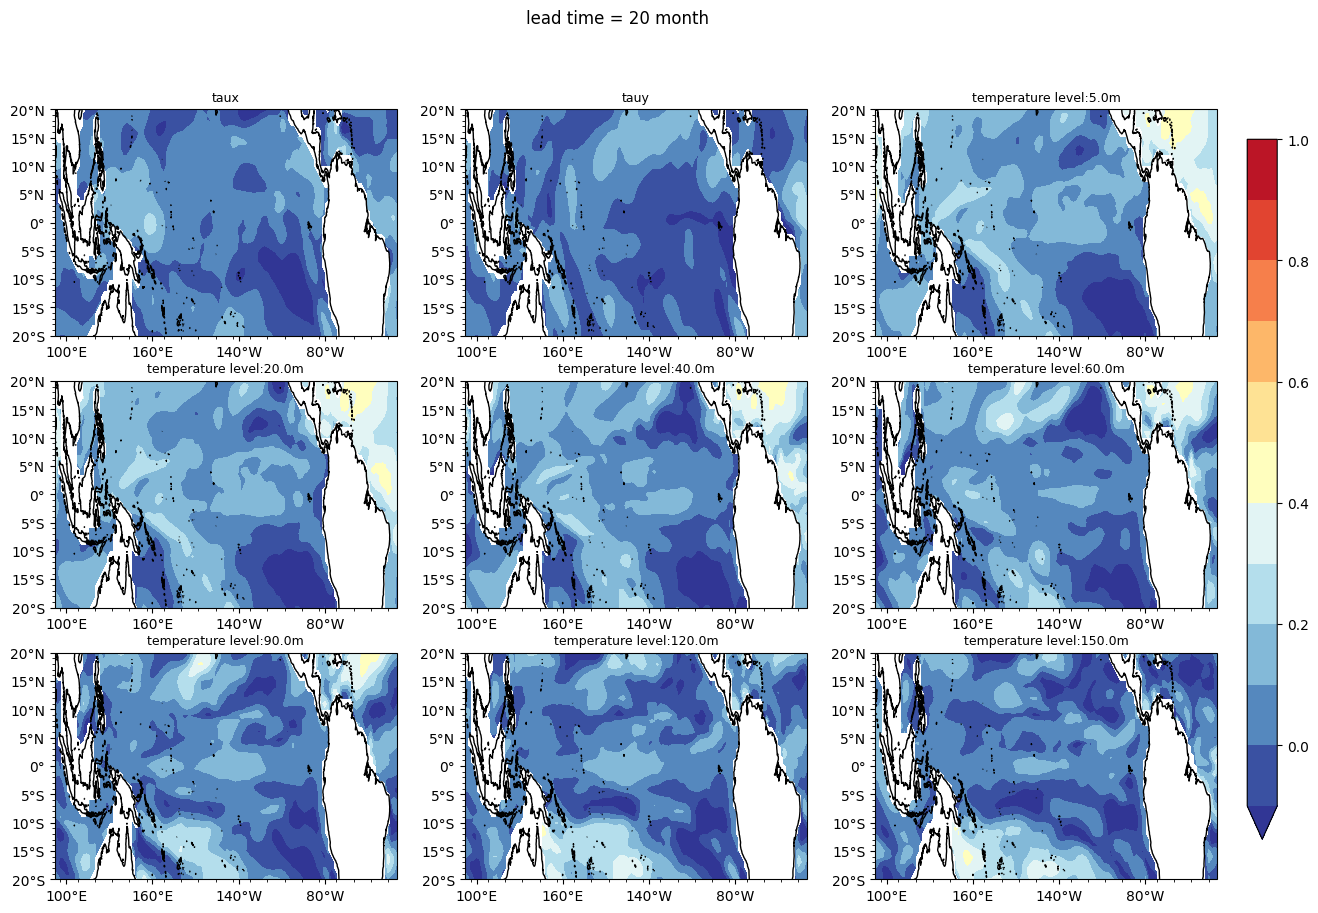

In [68]:
import cartopy.crs as ccrs
import sacpy.Map
def init_map(fig,idx):
    ax = fig.add_subplot(3,3,idx,projection=ccrs.PlateCarree(central_longitude=180))
    # ax.coastlines()
    # ax.set_aspect("auto")
    return ax

lon = np.arange(2,359,2)[45:165]
# lat = np.arange(-20,20+1,1)
lat = np.array( [-20. , -19. , -18. , -17. , -16. , -15. , -14. , -13. , -12. , -11. ,
       -10. ,  -9. ,  -8. ,  -7. ,  -6. ,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,
        -2.5,  -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,
         2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   6. ,   7. ,   8. ,   9. ,
        10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,  18. ,  19. ,
        20. ])

titles = [
    'taux','tauy'
]
for i in [5.,  20.,  40.,  60.,  90., 120., 150.]:
    titles.append("temperature level:"+str(i)+'m')
for i in range(20):
    fig = plt.figure(figsize=(15, 10))
    # fig.sub
    fig.suptitle(f'lead time = {i+1} month', fontsize=12)
    for j in range(9):
        # ax = fig.add_subplot(3,3, j + 1)
        ax = init_map(fig,j+1)
        m = ax.scontourf(lon,lat,np.array(corr_ls)[i,j],levels=np.arange(-0.1,1+0.01,0.1),cmap="RdYlBu_r", transform=ccrs.PlateCarree(),         extend='min')
        ax.init_map(stepx=60,stepy=5)
        # ax.sig_plot(lon,lat,1 - corrs1[i, j],thrshd=0.5)
        ax.set_title(titles[j],fontsize=9)
    ax_bar = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(m, cax=ax_bar)
    plt.savefig(f"./pic/lim_pred_lev{i+1}.png",dpi=300,bbox_inches='tight')
